# Part 3: EDA & Visualization


## 1. Analyze:
    - Jobs posted per location
    - Salary ranges
    - Keyword trends in job titles

In [26]:
# Import necessary Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [7]:
# Load the dataset
data = pd.read_csv('clean_job_descriptions.csv')

In [13]:
# Basic count of jobs per location
location_counts = data['Location'].value_counts()

# Display the result
print(location_counts)

Location
Seoul                        15104
Apia                         15057
Valletta                      7723
Caracas                       7694
Mogadishu                     7689
                             ...  
Accra                         7312
Kyiv (also known as Kiev)     7307
ReykjavÃ­k                    7292
Kampala                       7290
Vilnius                       7273
Name: count, Length: 214, dtype: int64


In [15]:
# Define ranges
bins = [0, 50000, 70000, 90000, float('inf')]
labels = ['Lowest (0-50k)', 'Mid (50-100k)', 'High (100-150k)', 'VeryHigh (150k+)']

# Categorize each job
data['Salary Range'] = pd.cut(data['Average Salary'], bins=bins, labels=labels)

# Count jobs in each range
salary_counts = data['Salary Range'].value_counts().sort_index()

# Display result
pd.DataFrame(data=salary_counts)

,count
Salary Range,
Lowest (0-50k),0
Mid (50-100k),60686
High (100-150k),1238562
VeryHigh (150k+),316692


In [17]:
from collections import Counter

# Step 1: Clean and split job titles
data['Title'] = data['Title'].fillna('').str.lower()
words = data['Title'].str.split()

# Step 2: Flatten the list of words
all_words = [word for title in words for word in title]

# Step 3: Count keyword frequency
common_words = Counter(all_words).most_common(10)

# Step 4: Display top 10 keywords
print("Top 10 Keywords in Job Titles:")
for word, count in common_words:
    print(f"{word}: {count}")


Top 10 Keywords in Job Titles:
manager: 235995
engineer: 162785
analyst: 145839
specialist: 135642
designer: 117729
marketing: 97657
assistant: 66413
coordinator: 65673
network: 62953
developer: 62738


## 2. Visualizations:
    - Bar chart: Top job locations
    - Word cloud: Common keywords in job titles
    - Box plot: Salary range (if available)
    - Trend chart: Jobs posted over days/weeks

     Location                         Title
0     Douglas  digital marketing specialist
1    Ashgabat                 web developer
2       Macao            operations manager
3  Porto-Novo              network engineer
4    Santiago                 event manager


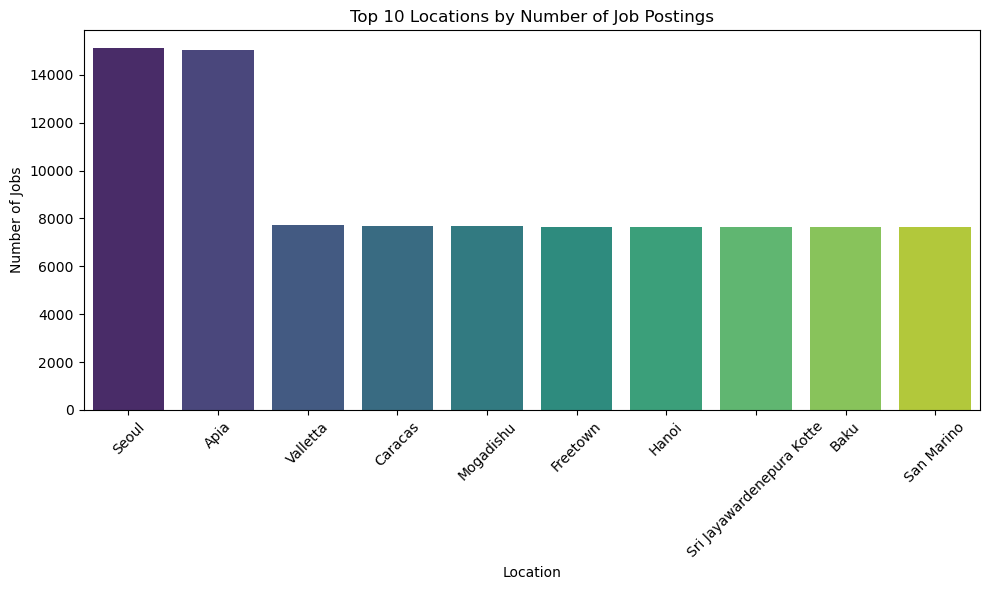

In [28]:
# Preview the data
print(data[['Location', 'Title']].head())

# Count number of jobs per location
location_counts = data['Location'].value_counts().reset_index()
location_counts.columns = ['Location', 'Job Count']

# Display top 10 locations with the most jobs
top_locations = location_counts.head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=top_locations, x='Location', y='Job Count', palette='viridis')
plt.title('Top 10 Locations by Number of Job Postings')
plt.xlabel('Location')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


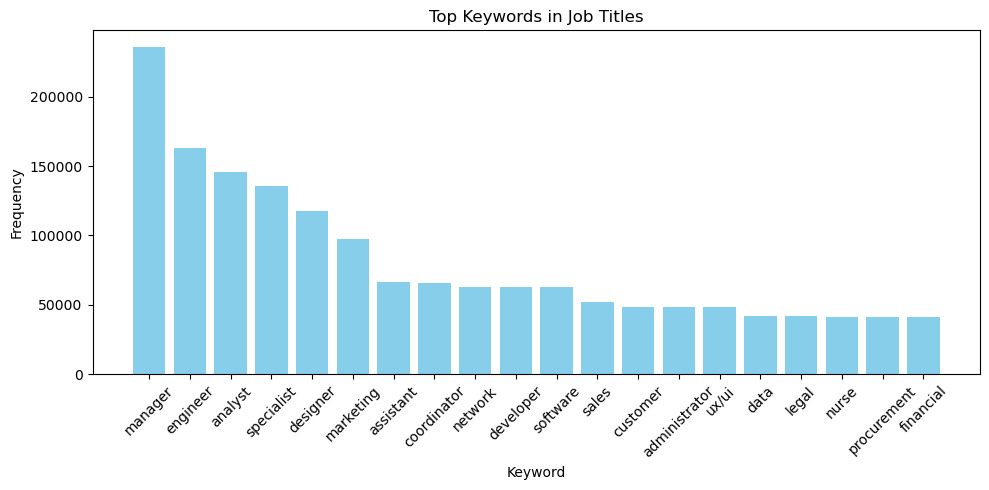

In [30]:
# Step 1: Convert titles to lowercase and split into words
words = data['Title'].dropna().str.lower().str.split()

# Step 2: Count word frequencies
all_words = [word for title in words for word in title]
common_words = Counter(all_words).most_common(20)

# Step 3: Convert to DataFrame for plotting
word_df = pd.DataFrame(common_words, columns=['Keyword', 'Count'])

# Step 5: Plot
plt.figure(figsize=(10, 5))
plt.bar(word_df['Keyword'], word_df['Count'], color='skyblue')
plt.xticks(rotation=45)
plt.title('Top Keywords in Job Titles')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

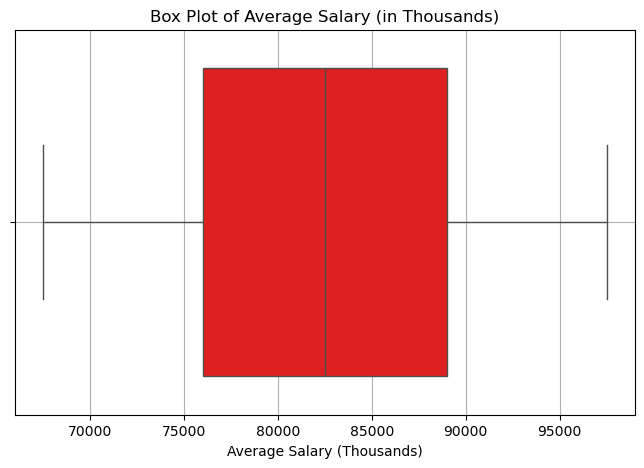

In [32]:
# Ensure column is clean
data['Average Salary'] = pd.to_numeric(data['Average Salary'], errors='coerce')
data = data.dropna(subset=['Average Salary'])

# Create the box plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Average Salary'], color='red')
plt.title('Box Plot of Average Salary (in Thousands)')
plt.xlabel('Average Salary (Thousands)')
plt.grid(True)
plt.show()

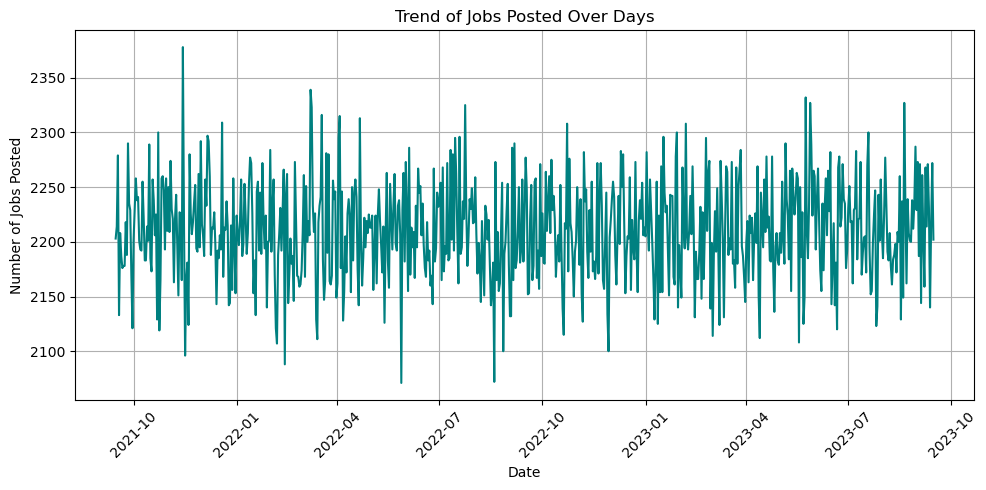

In [34]:
# Ensure the 'posting_date' is in datetime format
data['Date Posted'] = pd.to_datetime(data['Date Posted'], errors='coerce')

# Group by date and count the number of jobs posted each day
daily_posts = data.groupby(data['Date Posted'].dt.date).size()

# Plot the trend over days
plt.figure(figsize=(10, 5))
daily_posts.plot(kind='line', color='teal')
plt.title('Trend of Jobs Posted Over Days')
plt.xlabel('Date')
plt.ylabel('Number of Jobs Posted')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()